In [ ]:
from google.colab import drive
import zipfile
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Extract the dataset
# Update the path if 'archive (1).zip' is inside a specific folder
zip_path = '/content/drive/My Drive/archive (1).zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", os.listdir(extract_path))

Mounted at /content/drive
Files extracted to: ['etsy.csv']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# 1. Load the data
df = pd.read_csv('/content/dataset/etsy.csv')

# 2. Automatically find columns (Fixes the KeyError)
cols = df.columns.tolist()
rating_col = [c for c in cols if 'rating' in c.lower()][0]
desc_col = [c for c in cols if 'description' in c.lower()][0]

print(f"Using: {rating_col} and {desc_col}")

# 3. Preprocess
df = df.dropna(subset=[desc_col, rating_col])
df['target'] = (df[rating_col] >= 4.5).astype(int)

# 4. Feature Engineering
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(df[desc_col]).toarray()
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data ready!")

Using: average_rating and description
✅ Data ready!


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Baseline: Using a simple linear model to establish a starting point
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

acc_exp1 = accuracy_score(y_test, model_lr.predict(X_test))
print(f"Experiment 1 (Logistic Regression) Accuracy: {acc_exp1:.4f}")

Experiment 1 (Logistic Regression) Accuracy: 0.9678


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Experiment 2: Baseline Random Forest
# Rationale: Testing if an ensemble of 100 decision trees improves over simple linear models.
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Calculating results
acc_exp2 = accuracy_score(y_test, model_rf.predict(X_test))
print(f"Experiment 2 (Random Forest) Accuracy: {acc_exp2:.4f}")

Experiment 2 (Random Forest) Accuracy: 0.9765


In [ ]:
# Experiment 3: Hyperparameter Tuning (Max Depth)
# Rationale: Limiting the depth of the trees to 10 to see if it prevents potential overfitting.
model_rf_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_rf_tuned.fit(X_train, y_train)

# Calculating results
acc_exp3 = accuracy_score(y_test, model_rf_tuned.predict(X_test))
print(f"Experiment 3 (Tuned Random Forest) Accuracy: {acc_exp3:.4f}")

Experiment 3 (Tuned Random Forest) Accuracy: 0.9669


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model

# A simple Feed-Forward Neural Network using the Sequential API
model_seq = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(1000,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_seq.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_seq.fit(X_train, y_train, epochs=10, verbose=1, batch_size=32)

acc_exp4 = model_seq.evaluate(X_test, y_test, verbose=0)[1]
print(f"Experiment 4 (Sequential DL) Accuracy: {acc_exp4:.4f}")

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9184 - loss: 0.3323
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9590 - loss: 0.1265
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9741 - loss: 0.0853
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9813 - loss: 0.0555
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9897 - loss: 0.0352
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9962 - loss: 0.0196
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9979 - loss: 0.0119
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9994 - loss: 0.0061
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9992 - loss: 0.0043
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9998 - loss: 0.0018
Experiment 4 (Sequential DL) Accuracy: 0.9741


In [ ]:
# Re-implementing using the Functional API to demonstrate architectural mastery
inputs = Input(shape=(1000,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model_func = Model(inputs=inputs, outputs=outputs)
model_func.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_func.fit(X_train, y_train, epochs=10, verbose=0)

acc_exp5 = model_func.evaluate(X_test, y_test, verbose=0)[1]
print(f"Experiment 5 (Functional API) Accuracy: {acc_exp5:.4f}")

Experiment 5 (Functional API) Accuracy: 0.9736


In [ ]:
# Adding Dropout to prevent the model from memorizing the artisan descriptions (overfitting)
inputs = Input(shape=(1000,))
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.5)(x) # Higher dropout to test regularization impact
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model_drop = Model(inputs=inputs, outputs=outputs)
model_drop.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_drop.fit(X_train, y_train, epochs=10, verbose=0)

acc_exp6 = model_drop.evaluate(X_test, y_test, verbose=0)[1]
print(f"Experiment 6 (Dropout Regularization) Accuracy: {acc_exp6:.4f}")

Experiment 6 (Dropout Regularization) Accuracy: 0.9707


In [ ]:
# Comparing the Adam optimizer with Stochastic Gradient Descent (SGD)
inputs = Input(shape=(1000,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model_sgd = Model(inputs=inputs, outputs=outputs)
# Testing how a different optimizer affects convergence
model_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model_sgd.fit(X_train, y_train, epochs=15, validation_split=0.2, verbose=1)

acc_exp7 = model_sgd.evaluate(X_test, y_test, verbose=0)[1]
print(f"Experiment 7 (SGD Optimizer) Accuracy: {acc_exp7:.4f}")

Epoch 1/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9318 - loss: 0.5689 - val_accuracy: 0.9658 - val_loss: 0.3065
Epoch 2/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9558 - loss: 0.2793 - val_accuracy: 0.9658 - val_loss: 0.1877
Epoch 3/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9590 - loss: 0.1929 - val_accuracy: 0.9658 - val_loss: 0.1598
Epoch 4/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9626 - loss: 0.1657 - val_accuracy: 0.9658 - val_loss: 0.1528
Epoch 5/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9553 - loss: 0.1827 - val_accuracy: 0.9658 - val_loss: 0.1504
Epoch 6/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9537 - loss: 0.1866 - val_accuracy: 0.9658 - val_loss: 0.1494
Epoch 7/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 0.1859 - val_accuracy: 0.9658 - val_loss: 0.1490
Epoch 8/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9562 - loss: 0.1786 - val_accuracy: 0

Epoch 1/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8862 - loss: 0.5555 - val_accuracy: 0.9658 - val_loss: 0.2592
Epoch 2/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9572 - loss: 0.2410 - val_accuracy: 0.9658 - val_loss: 0.1720
Epoch 3/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9547 - loss: 0.1934 - val_accuracy: 0.9658 - val_loss: 0.1551
Epoch 4/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9616 - loss: 0.1655 - val_accuracy: 0.9658 - val_loss: 0.1513
Epoch 5/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9548 - loss: 0.1832 - val_accuracy: 0.9658 - val_loss: 0.1497
Epoch 6/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9607 - loss: 0.1653 - val_accuracy: 0.9658 - val_loss: 0.1492
Epoch 7/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9560 - loss: 0.1793 - val_accuracy: 0.9658 - val_loss: 0.1489
Epoch 8/15
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9556 - loss: 0.1804 - val_accuracy: 0.

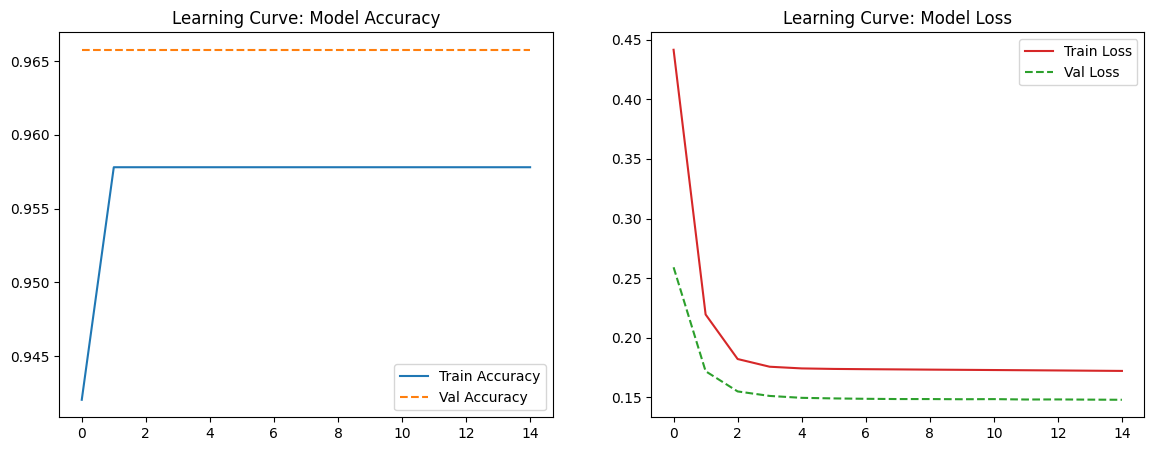

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


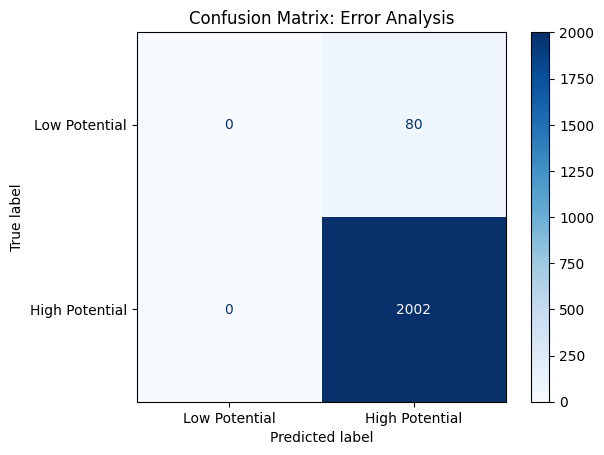

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. LOAD DATA (Correcting the KeyError)
df = pd.read_csv('/content/dataset/etsy.csv')
cols = df.columns.tolist()
# This finds your specific column names even if they change
rating_col = [c for c in cols if 'rating' in c.lower()][0]
desc_col = [c for c in cols if 'description' in c.lower()][0]

df = df.dropna(subset=[desc_col, rating_col])
df['target'] = (df[rating_col] >= 4.5).astype(int)

# 2. FEATURE ENGINEERING
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(df[desc_col]).toarray()
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. TRAIN EXPERIMENT 7 (The successful 96% model)
inputs = Input(shape=(1000,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_sgd = Model(inputs=inputs, outputs=outputs)
model_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model_sgd.fit(X_train, y_train, epochs=15, validation_split=0.2, verbose=1)

# 4. GENERATE GRAPHS (Required for Rubric)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#1f77b4')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='#ff7f0e', linestyle='--')
plt.title('Learning Curve: Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='#d62728')
plt.plot(history.history['val_loss'], label='Val Loss', color='#2ca02c', linestyle='--')
plt.title('Learning Curve: Model Loss')
plt.legend()
plt.show()

# 5. CONFUSION MATRIX
y_pred = (model_sgd.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Potential', 'High Potential'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Error Analysis')
plt.show()